In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [1]:
import numpy as np 
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels) , (test_data, test_labels) = mnist.load_data()

In [3]:
train_data.shape 

(60000, 28, 28)

In [4]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

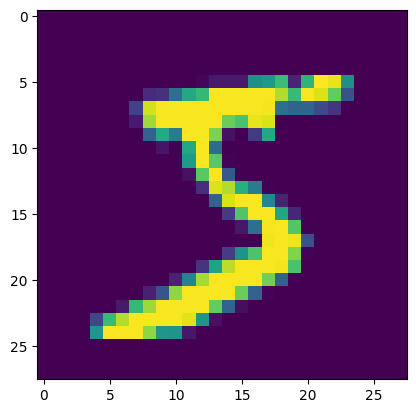

In [5]:
plt.imshow(train_data[0]) #mostrar la primera imagen

In [6]:
model = models.Sequential() #contruye redes neuronales aplicando capas de forma lineal 
#agregando capas
model.add(layers.Dense(512,activation='relu' , input_shape=(28*28,))) #construye la primera capa densa de 512 neuronas de 28x28pixeles
model.add(layers.Dense(10,activation='softmax'))#de 10  neuronas la segunda capa porque son 10 posibles salidas

c:\Users\fisica\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compilar la red neuronal dejando un optimizador llamdo  y una funcion de perdida categoicl t una metrica de exito accuracy
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()#red neuronal secuancial con dos tipos de datos 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#entrenando el modelo
#cambiando´rimero la forma de los datos
x_train = train_data.reshape((60000,28*28))#bajar a dos dimencionas para facilitar la red neuronal
x_train = x_train.astype('float32')/255 #es mas facil manjear float y /255 es el numero maximo para que me de numero de 0 a 1

x_test = test_data.reshape((10000,28*28))#bajar a dos dimencionas para facilitar la red neuronal
x_test = x_test.astype('float32')/255 #es mas facil manjear float y /255 es el numero maximo para que me de numero de 0 a 1

In [10]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
#hacer una transformacion a los labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
train_labels[0]

np.uint8(5)

In [13]:
y_train[0]#muestra las posibles salidas pero muestra un 1 donde debe ir 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [14]:
#entrenando la red 

model.fit(x_train, y_train, epochs=5, batch_size=128)#itera 5 epocas o interacciones con lotes de 128 unidades

#cada vez qye entrenaba la precision sube pero la perdidabaja 

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8673 - loss: 0.4478
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9652 - loss: 0.1206
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9780 - loss: 0.0733
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0506
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9891 - loss: 0.0377


In [15]:
#evaluando como funaciona la red de datos 
model.evaluate(x_test,y_test)  #tiene una muy buena presicion para el analisis de estos numeros

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9780 - loss: 0.0721


[0.061019085347652435, 0.9815000295639038]